In [2]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/"My Drive"/"Colab Notebooks"/master_project/evaluation

/content/drive/My Drive/Colab Notebooks/master_project/evaluation


In [0]:
%%capture
!pip install krippendorff

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import pickle
import random
from statistics import mode, StatisticsError, mean, stdev
import krippendorff
import numpy as np
from sklearn.metrics import cohen_kappa_score
import copy
import csv
from collections import Counter
import sys
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utilities import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
with open("../HAN/df_all.pkl", "rb") as handle:
    df_all = pickle.load(handle)

In [0]:
def get_length_info(lst):
    char_length = []
    word_length = []
    for item in lst:
        char_length.append(len(item))
        word_length.append(len(item.split()))
    print(f"Avg. Length (char) = {round(mean(char_length), 2)} (SD={round(stdev(char_length), 2)})")
    print(f"Avg. Length (word) = {round(mean(word_length), 2)} (SD={round(stdev(word_length), 2)})\n")

In [22]:
all_sentences = df_all.words
negative_sentences = df_all.words[df_all.categories==0]
positive_sentences = df_all.words[df_all.categories==1]
for lst in [all_sentences, negative_sentences, positive_sentences]:
    get_length_info(lst)

Avg. Length (char) = 78.06 (SD=26.78)
Avg. Length (word) = 15.62 (SD=5.08)

Avg. Length (char) = 78.35 (SD=26.98)
Avg. Length (word) = 15.65 (SD=5.09)

Avg. Length (char) = 77.77 (SD=26.57)
Avg. Length (word) = 15.58 (SD=5.07)



In [0]:
    char_length = []
    word_length = []
    for item in df_all.words:
        char_length.append(len(item))
        word_length.append(len(item.split()))

In [0]:
char_random = random.sample(char_length, 25000)
char_random_y = [Counter(char_random)[i] for i in char_random]
word_random = random.sample(word_length, 25000)
word_random_y = [Counter(word_random)[i] for i in word_random]

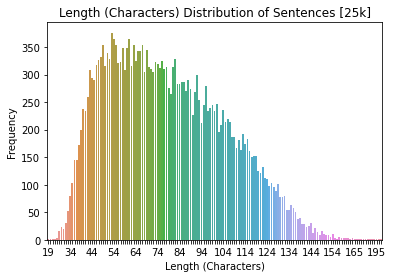

In [16]:
plot = sns.barplot(x = char_random, y = char_random_y)

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

# new_ticks = [i.get_text() for i in plot.get_xticklabels()]
# plt.xticks(range(0, len(new_ticks), 20), new_ticks[::20])

plt.title('Length (Characters) Distribution of Sentences [25k]')
plt.xlabel("Length (Characters)")
plt.ylabel("Frequency")
plt.savefig("length_char_dist" + '.png', figsize = (16, 9), dpi=150, bbox_inches="tight")
plt.show()
plt.close()

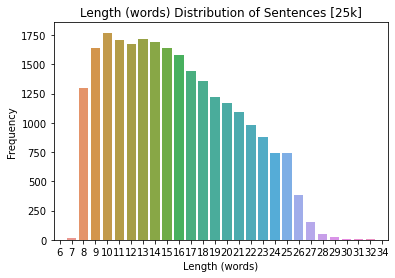

In [17]:
plot = sns.barplot(x = word_random, y = word_random_y)

# for ind, label in enumerate(plot.get_xticklabels()):
#     if ind % 10 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)

plt.title('Length (words) Distribution of Sentences [25k]')
plt.xlabel("Length (words)")
plt.ylabel("Frequency")
plt.savefig("length_word_dist" + '.png', figsize = (16, 9), dpi=150, bbox_inches="tight")
plt.show()
plt.close()

In [0]:
with open("df_evaluation.pickle", "rb") as handle:
    df_evaluation = pickle.load(handle)

In [0]:
original = df_evaluation["OG_sentiment"].to_list()
generated = df_evaluation["GEN_sentiment"].to_list()

In [71]:
count = 0
count_0_to_1_correct, count_0_to_1_total = 0, 0
count_1_to_0_correct, count_1_to_0_total = 0, 0
for og, gen in zip(original, generated):
    if og == 0:
        count_0_to_1_total += 1
    else:
        count_1_to_0_total += 1
    if og != gen:
        count += 1
        if og == 0:
            count_0_to_1_correct += 1
        else:
            count_1_to_0_correct += 1
print(f"accuracy [all] = {round((count/len(original))*100, 2)}%")
print(f"accuracy [0 -> 1] = {round((count_0_to_1_correct/count_0_to_1_total)*100, 2)}%")
print(f"accuracy [1 -> 0]= {round((count_1_to_0_correct/count_1_to_0_total)*100, 2)}%")

accuracy [all] = 23.65%
accuracy [0 -> 1] = 17.09%
accuracy [1 -> 0]= 30.21%


In [72]:
from sklearn.metrics import classification_report
print(classification_report(original, generated))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78     49987
           1       0.80      0.70      0.75     50013

    accuracy                           0.76    100000
   macro avg       0.77      0.76      0.76    100000
weighted avg       0.77      0.76      0.76    100000



In [0]:
# Accuracy human evaluation subset

In [74]:
pd.set_option('display.max_colwidth', -1) # show more of pandas dataframe
df_evaluation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,OG_sentences,OG_sentiment,GEN_sentences,GEN_sentiment
699432,i hooked it up according to the quick start manual and it was never able to obtain my guide information,0,i hooked it up according to the lazy start manual and it was never unable to obtain my guide information,0
699434,the right ingredients were definitely put into the music making aspect of the game,0,the right ingredients were definitely put into the music demolition aspect of the game,0
699437,i did not know it was white powder so was surprised to see my very dark hair covered in white powder though it did brush out,0,i did not know it cease black powder so was surprised to see my very dark hair bare in black powder if so it did brush out,0
699442,i love the rainbow light line but bought this product by accident,0,i love the rainbow dark line but bought this product by accident,0
699444,not horrible but not exciting the gameplay is weak,0,not beautiful but exciting the gameplay is weak,0
...,...,...,...,...
799995,the size is just right for a meal,1,the size is unjust right for a meal,1
799996,clean up is a breeze due to the nice slick finish,1,dirty up is a breeze due to the nasty dry finish,1
799997,unfortunately the initial mouse arrived missing the tab that is to be removed to enable squeaking,0,unfortunately the initial mouse arrived missing the tab not that is to be removed to enable deep,0
799998,we have used this in the oven microwave safe freezer and dishwasher,1,we have used this in the oven microwave dangerous freezer and dishwasher,1


In [0]:
with open("../sentence_generatedsentence_dict.pickle", "rb") as handle:
    sentence_generatedsentence_dict = pickle.load(handle)

In [0]:
og_negative_sentences = [sent for sent in df_evaluation.OG_sentences[df_evaluation["OG_sentiment"] == 0].to_list() if len(sent.split()) <= 15]
og_positive_sentences = [sent for sent in df_evaluation.OG_sentences[df_evaluation["OG_sentiment"] == 1].to_list() if len(sent.split()) <= 15]

In [0]:
random.seed(42)

human_evaluation_og_sti = random.sample(og_negative_sentences, 50) + random.sample(og_positive_sentences, 50)
human_evaluation_gen_sti = [sentence_generatedsentence_dict[sent] for sent in human_evaluation_og_sti]

In [0]:
random.seed(4)

human_evaluation_og_nat = random.sample(og_negative_sentences, 50) + random.sample(og_positive_sentences, 50)
human_evaluation_gen_nat = [sentence_generatedsentence_dict[sent] for sent in human_evaluation_og_nat]

In [0]:
original_sentence = df_evaluation["OG_sentences"].to_list()
generated_sentence = df_evaluation["GEN_sentences"].to_list()

original_sentiment = df_evaluation["OG_sentiment"].to_list()
generated_sentiment = df_evaluation["GEN_sentiment"].to_list()

wrong_0_to_1, correct_0_to_1 = [], []
wrong_1_to_0, correct_1_to_0 = [], []

for og_sentence, gen_sentence, og_sentiment, gen_sentiment in zip(original_sentence, generated_sentence, original_sentiment, generated_sentiment):
    if og_sentiment != gen_sentiment:
        if og_sentiment == 0: 
            correct_0_to_1.append((og_sentence, gen_sentence))
        else:
            correct_1_to_0.append((og_sentence, gen_sentence))
    else:
        if og_sentiment == 0: 
            wrong_0_to_1.append((og_sentence, gen_sentence))
        else:
            wrong_1_to_0.append((og_sentence, gen_sentence))
    

In [0]:
# correct_1_to_0
# for i, j in correct_1_to_0[:10000]:
#     i = " ".join(i.strip().split())
#     j = " ".join(j.strip().split())
#     if len(i) <= 100:
#         print("",i,"\n",j, end="\n\n")

In [81]:
# 10 wrong 0 -> 1
wrong_0_to_1[:10]
for i, j in wrong_0_to_1[:10]:
    print(i, "#", j)

i hooked it up according to the quick start manual and it was never able to obtain my guide information # i hooked it up according to the lazy start manual and it was never unable to obtain my guide information
the right ingredients were definitely put into the music making aspect of the game # the right ingredients were definitely put into the music demolition aspect of the game
i did not know it was white powder so was surprised to see my very dark hair covered in white powder though it did brush out # i did not know it cease black powder so was surprised to see my very dark hair bare in black powder if so it did brush out
i love the rainbow light line but bought this product by accident # i love the rainbow dark line but bought this product by accident
not horrible but not exciting the gameplay is weak # not beautiful but  exciting the gameplay is weak
the bra is relatively comfortable for an underwire bra and seems to be well made # the bra is technically uncomfortable for an under

In [82]:
# 10 correct 0 -> 1
correct_0_to_1[:10]
for i, j in correct_0_to_1[:10]:
    print(i, "#", j)

do not think i am up for a third try # do not disbelieve i am up for a third try
there is a much cheaper version which has a clock timer and pause on serve function and that is all i really need # here is a little cheaper version which has a clock timer and pause on serve function and that is all i hardly need
i could not have been happier with this tripod until it broke on me about i minutes ago # i could not abandon been happier with this tripod not until it rich on me about i minutes ago
i would have been happy to pay an additional i i dollars for a bowl with a copper valve inside # i disallow abandon been happy to pay an additional i i dollars for a bowl with a copper valve inside
it looks nice but not much like wood # it looks nice but not little like wood
but for my pills that is not an issue # but not for my pills that is not an issue
you can probably fit i credit cards top # you cannot probably fit i credit cards top
as others reported the padding on the bottom goes flat within

In [83]:
# 10 wrong 1 -> 0
wrong_1_to_0[:10]
for i, j in wrong_1_to_0[:10]:
    print(i, "#", j)

instead of potatoes i use this to rice my turnips and they are a big hit with my family # instead of potatoes i use this to rice my turnips and not they are a big hit with my family
i had one of these for my iphone # i had one of these not for my iphone
however i do add a paper filter for some fine grinds to keep excessive sediment and grinds from ending up in my coffee cup # however i do add a paper filter for some fine grinds to lose excessive sediment and grinds from ending up in my coffee cup
the iphone i gs has many functions that consumers will love to experience themselves # the iphone i gs has few functions that consumers dislike love to experience themselves
have to be more careful when i empty the grounds # have to be less careful when i fill the grounds
it had a square container for the food that when in place on the scale blocked the view of the measuring window # it had a square container for the food that when in place on the scale blocked the view of the not measuring wi

In [84]:
# 10 correct 0 -> 1
correct_1_to_0[:10]
for i, j in correct_1_to_0[:10]:
    print(i, "#", j)

love the design and the quality of the materials in this fiesta dinnerware # hate the design and the quality of the materials in this fiesta dinnerware
however it does get everything but very dark and old stains out perfectly well # however it abandon avoid everything but very dark and old stains out inadequately well
it was ridiculous when ever i could the phone was plugged in cause i would be dead with in the next few hours if not # it was ridiculous when ever i could the phone was plugged in cause i would be dead with in the previous many hours if not
it fits nicely on my countertop with room on top to put things # it ignorant not nicely on my countertop with room on top to put things
first you are given a standard ac power cord that plugs directly into the unit # first me cease given a standard ac power cord that plugs directly into the unit
only the plain white box the pan was shipped in said made in china # only the romantic white box the pan was shipped in said made in china
in 

In [0]:
reverse_dict = {"negative": 0, "positive": 1, "neither": 2, "either": 2} # made type in neither so added either as 2 as well

## Style Transfer Intensity 

In [0]:
# Style Transfer intensity
sti_responses = gc.open_by_url('https://docs.google.com/spreadsheets/d/1_B3ayl6-p3nRl3RUtTgcu7fGT2v3n6rg3CLrR4wTafQ/edit#gid=2064143541')
sti_response_sheet = sti_responses.sheet1
sti_reponse_data = sti_response_sheet.get_all_values()

In [0]:
# sti_reponse_data

In [88]:
sti_answer_dict = {}
for idx, row in enumerate(sti_reponse_data[1:]):
    if row[1] != "": 
        sti_answer_dict[idx] = [(idx, reverse_dict[i]) for idx, i in enumerate(row[2:-1])]

# inter-annotator agreement 
k_alpha = krippendorff.alpha([[i[1] for i in v] for k, v in sti_answer_dict.items()])
print("Krippendorffs' Alpha:")
print(round(k_alpha,4)) 

# inter-annotator agreement, ignoring neither cases
remove_indexes = []
for lst in [v for k, v in sti_answer_dict.items()]:
    for idx, i in enumerate(lst):
        if i[1] == 2:
            remove_indexes.append(idx)

sti_answers_without_neither = copy.deepcopy([v for k, v in sti_answer_dict.items()])
for lst in sti_answers_without_neither:
    for i in sorted(set(remove_indexes), reverse=True):
        del lst[i]

print("\nKrippendorffs' Alpha (ignoring neither cases):")
print(f"Answers remaining: {len(sti_answers_without_neither[0])}%")

k_alpha = krippendorff.alpha([[j[1] for j in usr] for usr in sti_answers_without_neither])
print(round(k_alpha,4)) 

Krippendorffs' Alpha:
0.1771

Krippendorffs' Alpha (ignoring neither cases):
Answers remaining: 54%
0.5764


In [89]:
# amount neither
neither_percentage = 0
for k, v in sti_answer_dict.items():
    v = [i[1] for i in v]
    neither_percentage += Counter(v)[2]/len(v)
print(f"Average amount of neither selected: {round((neither_percentage/3)*100, 2)}%")

Average amount of neither selected: 21.67%


In [0]:
# Select most common answer of each human evaluator, if all same, select random 
final_sti_human_answers = []
for idx, i in enumerate(np.array([[i[1] for i in v] for k, v in sti_answer_dict.items()]).transpose()):
    try:
        final_sti_human_answers.append((idx, mode(i)))
    except StatisticsError as e:
        final_sti_human_answers.append((idx, random.choice(i)))

In [0]:
with open("df_evaluation.pickle", "rb") as handle:
    df_evaluation = pickle.load(handle)

In [92]:
id_sentence_dict = {}
for idx, sentence in enumerate(sti_reponse_data[0][2:-1]):
    id_sentence_dict[idx] = sentence

sentence_human_sentiment = {}
for sentence_id, sentiment in final_sti_human_answers:
    if sentiment == 2:
        continue
    sentence_human_sentiment[id_sentence_dict[sentence_id]] = sentiment

human_sentiment = [v for k,v in sentence_human_sentiment.items()]
og_sentiment = []
for k, v in sentence_human_sentiment.items():
    og_sentiment.append(df_evaluation.OG_sentiment[df_evaluation.GEN_sentences==k].item())

# Accuracy style transfer intensity for human classification
count = 0
count_0_to_1_correct, count_0_to_1_total = 0, 0
count_1_to_0_correct, count_1_to_0_total = 0, 0
for og, gen in zip(og_sentiment, human_sentiment):
    if og == 0:
        count_0_to_1_total += 1
    else:
        count_1_to_0_total += 1
    if og != gen:
        count += 1
        if og == 0:
            count_0_to_1_correct += 1
        else:
            count_1_to_0_correct += 1
print(f"accuracy [including neither] = {round((count/len(final_sti_human_answers))*100, 2)}%")
print(f"accuracy [excluding neither] = {round((count/len(og_sentiment))*100, 2)}%")
print(f"accuracy [0 -> 1] = {round((count_0_to_1_correct/count_0_to_1_total)*100, 2)}%")
print(f"accuracy [1 -> 0]= {round((count_1_to_0_correct/count_1_to_0_total)*100, 2)}%")

# Agreement between human and automatic evaluation
gen_sentiment = []
for k, v in sentence_human_sentiment.items():
    gen_sentiment.append(df_evaluation.GEN_sentiment[df_evaluation.GEN_sentences==k].item())

k_alpha = krippendorff.alpha([gen_sentiment, human_sentiment])
print("\nKrippendorffs' Alpha:")
print(round(k_alpha,4)) 

# https://www.ncbi.nlm.nih.gov/pubmed/15883903 reference to cohen's kappa
print(f"Cohen's Kappa:\n{round(cohen_kappa_score(gen_sentiment, human_sentiment), 4)}")

accuracy [including neither] = 29.0%
accuracy [excluding neither] = 35.37%
accuracy [0 -> 1] = 26.19%
accuracy [1 -> 0]= 45.0%

Krippendorffs' Alpha:
0.4733
Cohen's Kappa:
0.4702


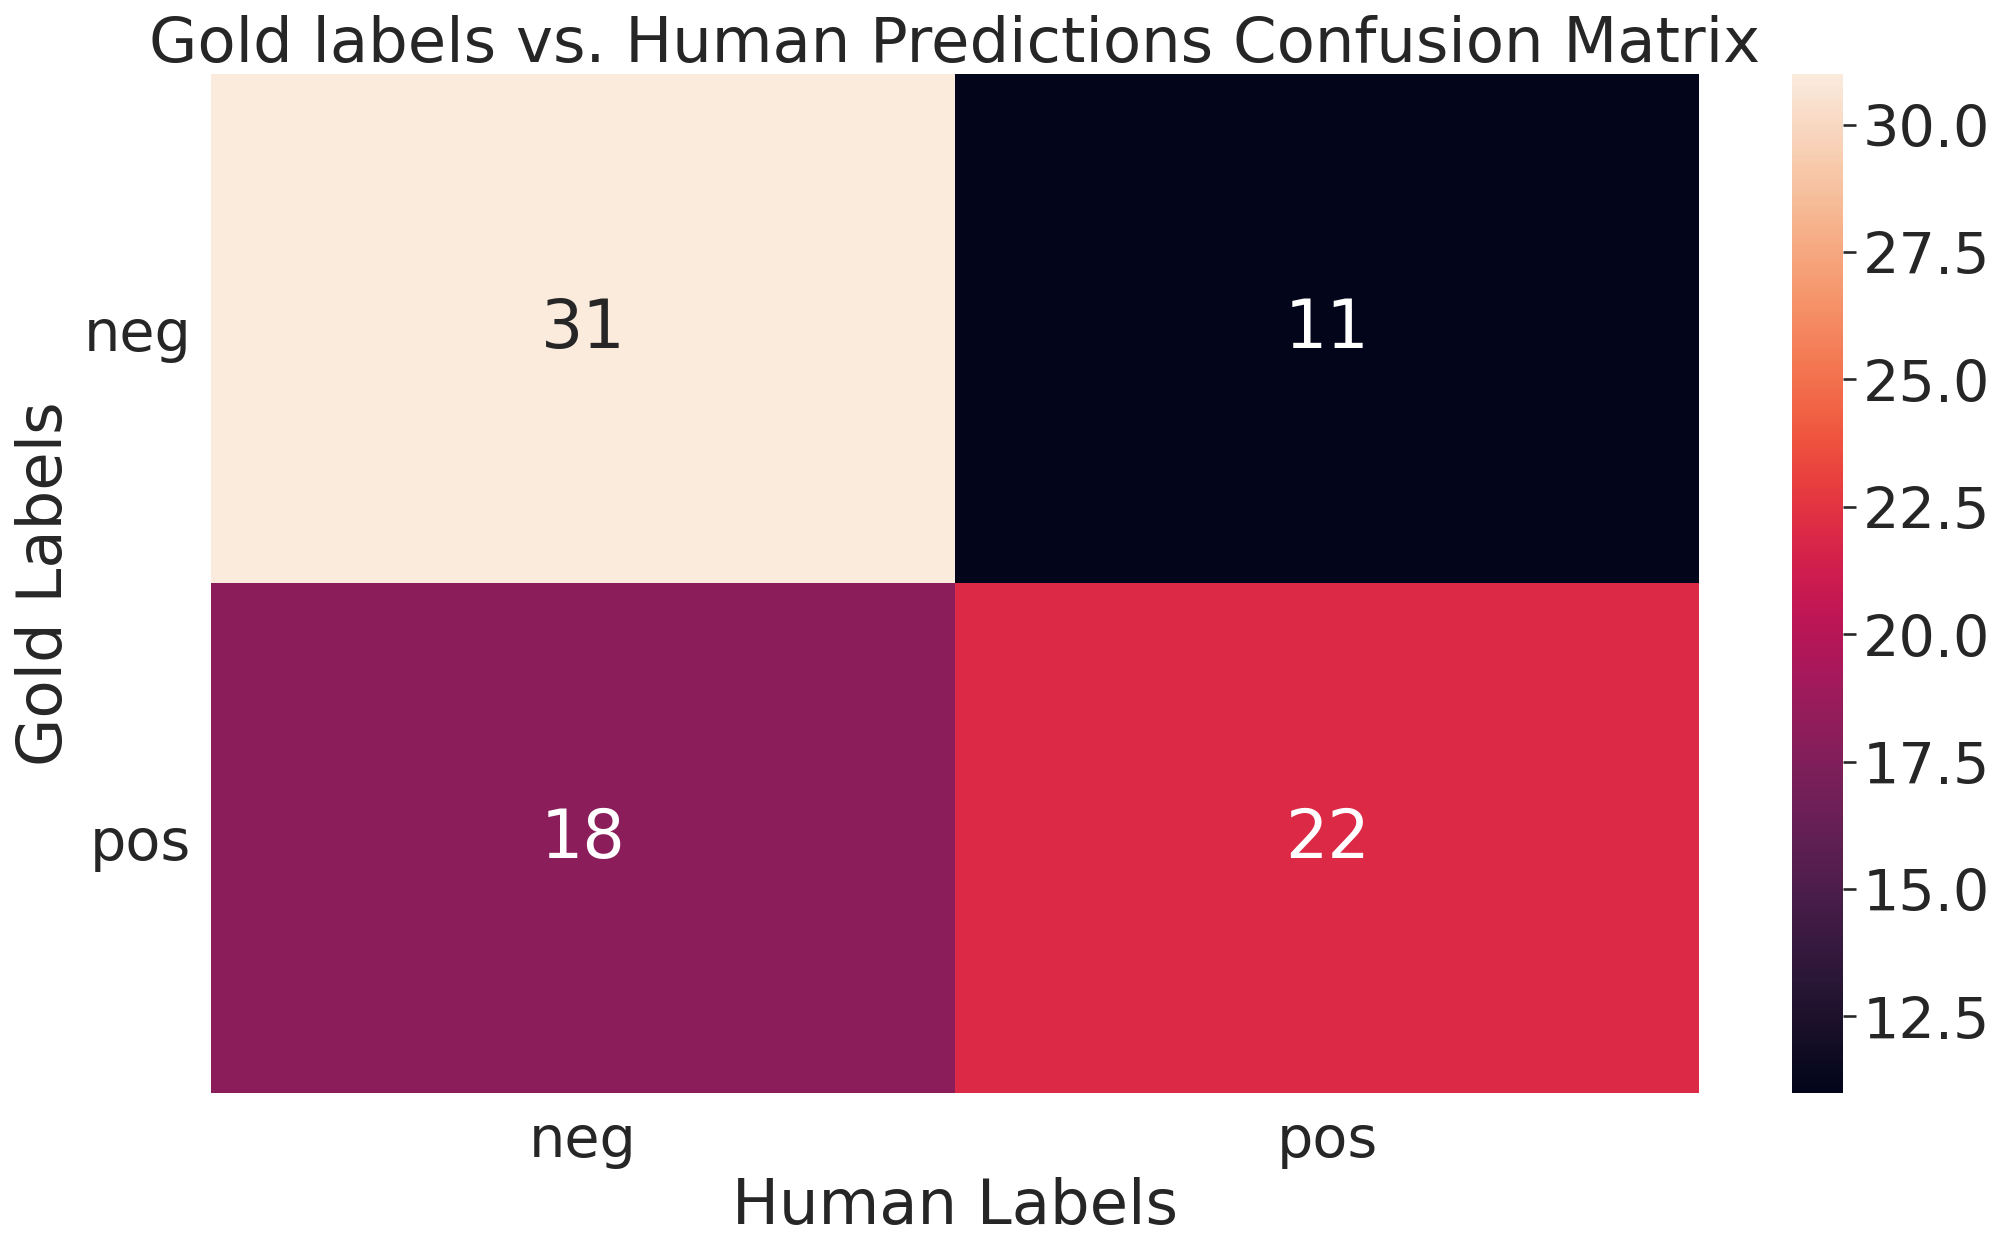

In [93]:
cm = confusion_matrix(og_sentiment, human_sentiment)
create_confusion_matrix(cm, ["neg", "pos"], show_plots=True, title="Gold labels vs. Human Predictions", 
                        xlabel="Human Labels", ylabel="Gold Labels", dir="", y_lim_value=2, save_plots=True)

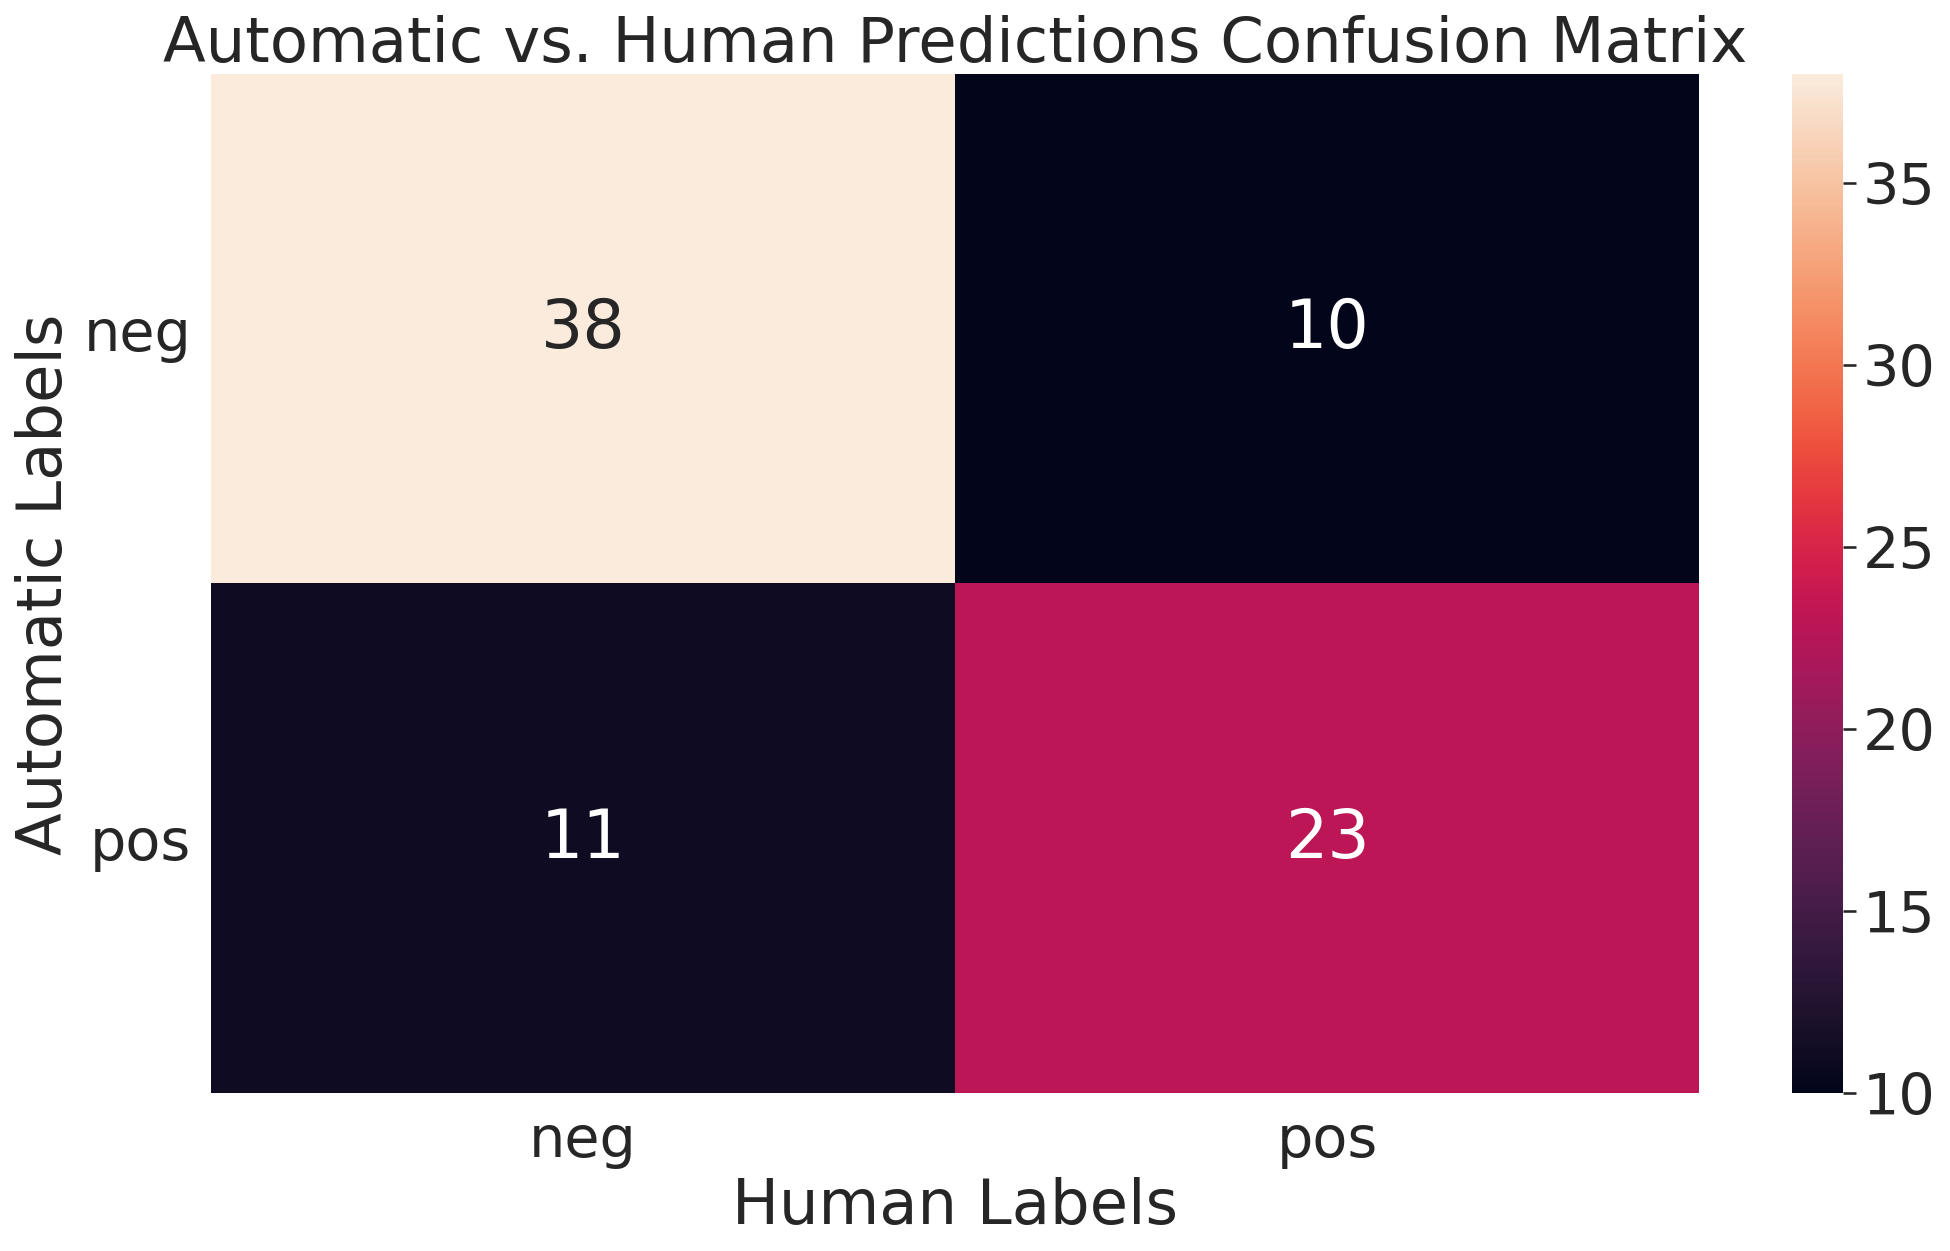

In [94]:
cm = confusion_matrix(gen_sentiment, human_sentiment)
create_confusion_matrix(cm, ["neg", "pos"], show_plots=True, title="Automatic vs. Human Predictions", 
                        xlabel="Human Labels", ylabel="Automatic Labels", dir="", y_lim_value=2, save_plots=True)

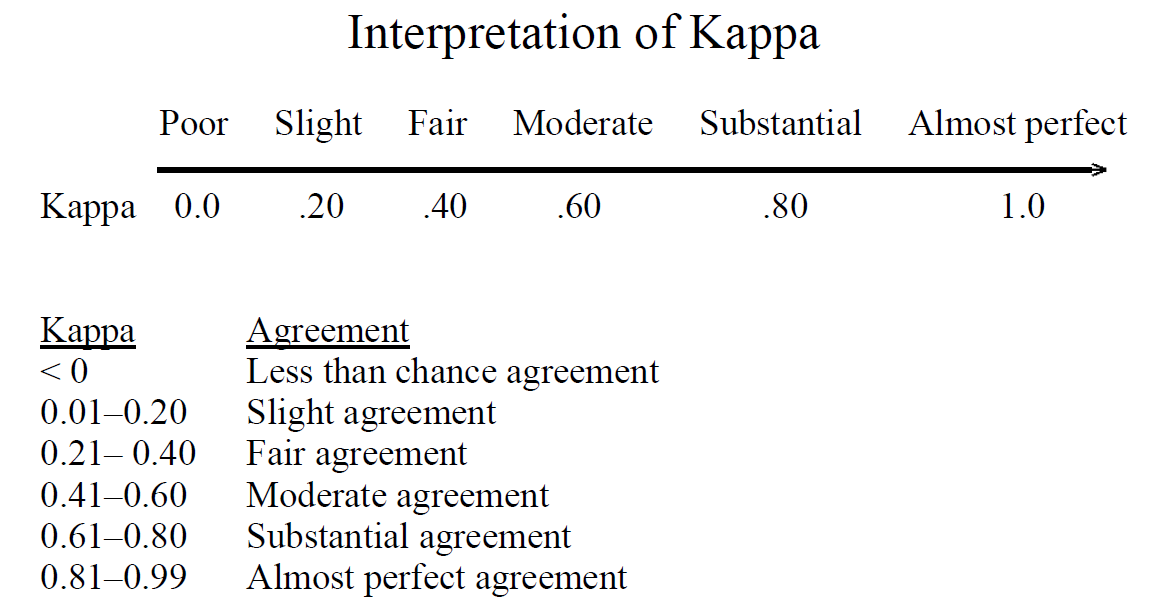

## Naturalness (Isolated)

In [0]:
# Naturalness (isolated)
nat_iso_responses = gc.open_by_url('https://docs.google.com/spreadsheets/d/1tEOalZErOjSOD8DGKfvi-edv8sKkGczLx0eYi7N6Kjw/edit#gid=1759015116')
nat_iso_response_sheet = nat_iso_responses.sheet1
nat_iso_reponse_data = nat_iso_response_sheet.get_all_values()

In [0]:
# nat_iso_reponse_data

In [97]:
nat_iso_answer_dict = {}
for idx, row in enumerate(nat_iso_reponse_data[1:]):
    if row[1] != "": 
        nat_iso_answer_dict[idx] = [int(i) for i in row[2:-1]]

# inter-annotator agreement 
print("Krippendorffs' Alpha:")
k_alpha = krippendorff.alpha([v for k,v in nat_iso_answer_dict.items()])
print(round(k_alpha,4)) 

Krippendorffs' Alpha:
0.1989


In [98]:
# naturalness mean (isolated)
naturalness_mean_list = []
for idx, row in enumerate(nat_iso_reponse_data[1:]):
    if row[1] != "": 
        naturalness_mean_list.append(int(i) for i in row[2:-1])

print("Mean of naturalness (isolated):")
print(round(mean([mean(i) for i in naturalness_mean_list]),4))

Mean of naturalness (isolated):
3.145


In [99]:
nat_all = []
for k, v in nat_iso_answer_dict.items():
    nat_all += v
nat_all_dist = Counter(nat_all)
nat_all_dist

Counter({1: 33, 2: 92, 3: 113, 4: 108, 5: 54})

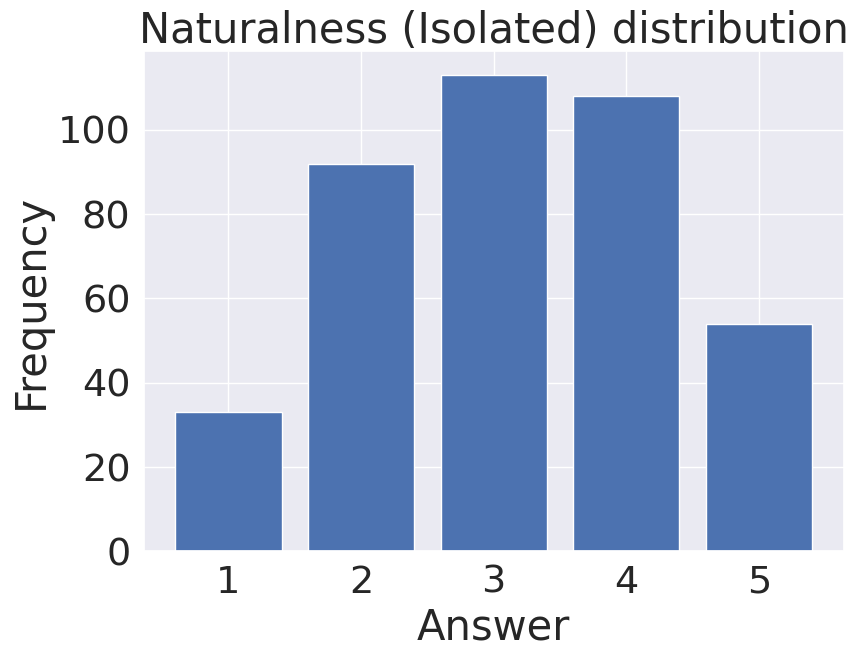

In [100]:
# naturalness (isolated) distribution

fig = plt.figure(figsize=[7, 5], dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.bar(nat_all_dist.keys(), nat_all_dist.values())
plt.title("Naturalness (Isolated) distribution")
plt.xlabel("Answer")
plt.ylabel("Frequency")
plt.savefig("naturalness_isolated_dist" + '.png', figsize = (16, 9), dpi=150, bbox_inches="tight")
plt.show()
plt.close()

In [101]:
df_evaluation

,OG_sentences,OG_sentiment,GEN_sentences,GEN_sentiment
699432,i hooked it up according to the quick start manual and it was never able to obtain my guide information,0,i hooked it up according to the lazy start manual and it was never unable to obtain my guide information,0
699434,the right ingredients were definitely put into the music making aspect of the game,0,the right ingredients were definitely put into the music demolition aspect of the game,0
699437,i did not know it was white powder so was surprised to see my very dark hair covered in white powder though it did brush out,0,i did not know it cease black powder so was surprised to see my very dark hair bare in black powder if so it did brush out,0
699442,i love the rainbow light line but bought this product by accident,0,i love the rainbow dark line but bought this product by accident,0
699444,not horrible but not exciting the gameplay is weak,0,not beautiful but exciting the gameplay is weak,0
...,...,...,...,...
799995,the size is just right for a meal,1,the size is unjust right for a meal,1
799996,clean up is a breeze due to the nice slick finish,1,dirty up is a breeze due to the nasty dry finish,1
799997,unfortunately the initial mouse arrived missing the tab that is to be removed to enable squeaking,0,unfortunately the initial mouse arrived missing the tab not that is to be removed to enable deep,0
799998,we have used this in the oven microwave safe freezer and dishwasher,1,we have used this in the oven microwave dangerous freezer and dishwasher,1


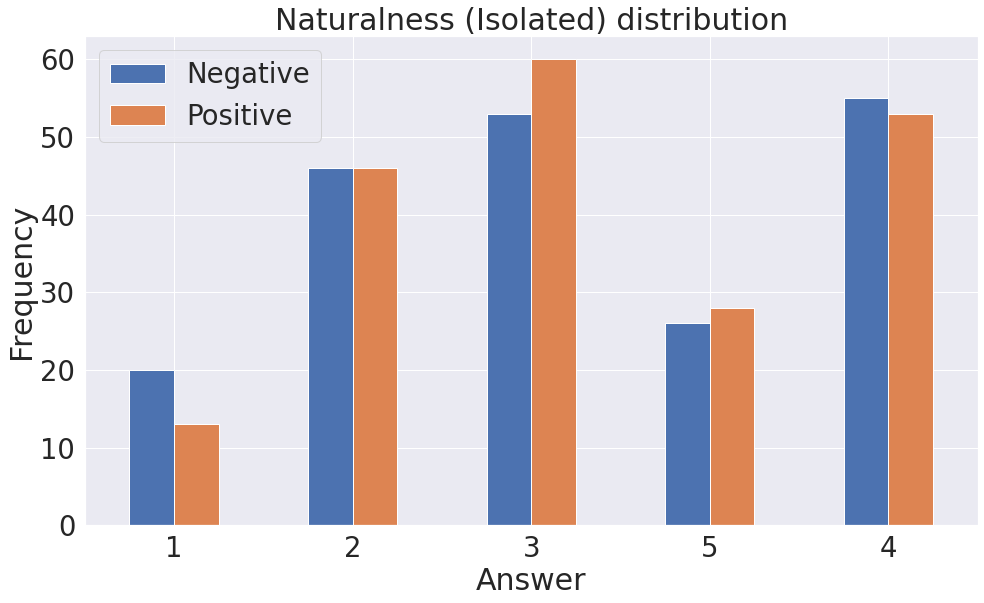

In [102]:
id_sentiment_dict = {}
for idx, sentence in enumerate(nat_iso_reponse_data[0][2:-1]):
    # GEN_sentiment
    sentiment = df_evaluation.OG_sentiment[df_evaluation.GEN_sentences == sentence].item()
    id_sentiment_dict[idx] = sentiment

nat_iso_answer_dict_div = {}
for idx, row in enumerate(nat_iso_reponse_data[1:]):
    if row[1] != "":
        nat_iso_answer_dict_div[idx] = ([int(i) for id, i in enumerate(row[2:-1]) if id_sentiment_dict[id] == 0],
                                        [int(i) for id, i in enumerate(row[2:-1]) if id_sentiment_dict[id] == 1])

nat_all_neg, nat_all_pos = [], []
for k, (v_neg, v_pos) in nat_iso_answer_dict_div.items():
    nat_all_neg += v_neg
    nat_all_pos += v_pos
nat_all_dist_neg = Counter(nat_all_neg)
nat_all_dist_pos = Counter(nat_all_pos)


df = pd.DataFrame([['g1','c1',10],['g1','c2',12],['g1','c3',13],['g2','c1',8],
                   ['g2','c2',10],['g2','c3',12]],columns=['group','column','val'])

df = pd.DataFrame([nat_all_dist_neg, nat_all_dist_pos]).T

ax = df.plot(kind='bar')
ax.figure.set_size_inches(16, 9)
plt.title("Naturalness (Isolated) distribution")
plt.xlabel("Answer")
plt.ylabel("Frequency")
plt.xticks(rotation='horizontal')
ax.figure.savefig("naturalness_isolated_dist_div" + '.png', figsize = (16, 9), dpi=150, bbox_inches="tight")
plt.legend(["Negative", "Positive"])
plt.show()
plt.close()


## Naturalness (Comparison)


In [0]:
# Naturalness (comparison)
nat_comp_responses = gc.open_by_url('https://docs.google.com/spreadsheets/d/1mFtsNNaJXDK2dT9LkLz_r8LSfIOPskDqn4jBamE-bns/edit#gid=890219669')
nat_comp_response_sheet = nat_comp_responses.sheet1
nat_comp_reponse_data = nat_comp_response_sheet.get_all_values()

In [0]:
# nat_comp_reponse_data

In [105]:
nat_comp_answer_dict = {}
for idx, row in enumerate(nat_comp_reponse_data[1:]):
    if row[1] != "": 
        nat_comp_answer_dict[idx] = [int(i) for i in row[2:-1]]

# inter-annotator agreement 
print("Krippendorffs' Alpha:")
k_alpha = krippendorff.alpha([v for k,v in nat_comp_answer_dict.items()])
print(round(k_alpha,4)) 

Krippendorffs' Alpha:
0.728


In [106]:
# naturalness mean (comparison)
naturalness_mean_list = []
for idx, row in enumerate(nat_comp_reponse_data[1:]):
    if row[1] != "": 
        naturalness_mean_list.append(int(i) for i in row[2:-1])

print("Mean of naturalness (comparison):")
print(round(mean([mean(i) for i in naturalness_mean_list]),4))

Mean of naturalness (comparison):
3.2267


In [0]:
nat_comp_questions = gc.open_by_url('https://docs.google.com/spreadsheets/d/1uxAGaOvJcb-Cg3wjTDEovTgR--TFZet0VnpzInljjfo/edit#gid=167268481')
nat_comp_questions_sheet = nat_comp_questions.sheet1
nat_comp_questions_data = nat_comp_questions_sheet.get_all_values()

170 59 67 1 3
Mean of naturalness (comparison) original vs. generated:
1.6933


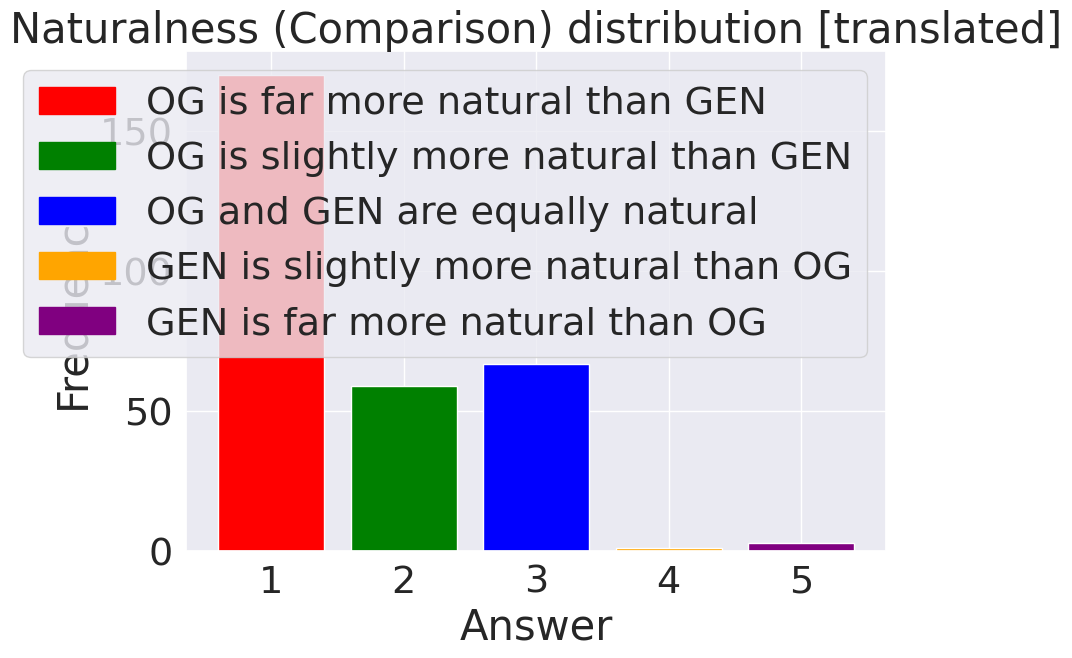

In [108]:
# naturalness (og vs. gen naturalness)

# 1: A is far more natural than B
# 2: A is slightly more natural than B
# 3: A and B are equally natural
# 4: B is slightly more natural than A
# 5 : B is far more natural than A

# 1: OG is far more natural than GEN 
# 2: OG is slightly more natural than GEN
# 3: OG and GEN are equally natural
# 4: GEN is slightly more natural than OG
# 5: GEN is far more natural than OG

one, two, three, four, five = 0, 0, 0, 0, 0
for idx, row in enumerate(nat_comp_reponse_data[1:]):
    if row[1] != "": 
        for idx2, (row, answer) in enumerate(zip(nat_comp_questions_data[1:], row[2:-1])):
            original, generated = row[-2:]
            answer = int(answer)
            # print("A", "B", "|", original, generated, "|", answer)
            if original == "A":
                if answer == 1:
                    one += 1
                if answer == 2:
                    two += 1
                if answer == 3:
                    three += 1
                if answer == 4:
                    four += 1
                if answer == 5:
                    five += 1
            if original == "B":
                if answer == 1:
                    five += 1
                if answer == 2:
                    four += 1
                if answer == 3:
                    three += 1
                if answer == 4:
                    two += 1
                if answer == 5:
                    one += 1

print(one,two,three,four,five)
print("Mean of naturalness (comparison) original vs. generated:")
print(round((one*1+two*2+three*3+four*4+five*5)/sum([one,two,three,four,five]),4))

# naturalness (comparison) distribution

fig = plt.figure(figsize=[7, 5], dpi=100)


answers = {'OG is far more natural than GEN ':'red', 
           'OG is slightly more natural than GEN':'green', 
           'OG and GEN are equally natural':'blue', 
           'GEN is slightly more natural than OG':'orange', 
           'GEN is far more natural than OG': 'purple'}         
labels = list(answers.keys())
handles = [plt.Rectangle((0,0),1,1, color=answers[label]) for label in labels]

ax = fig.add_axes([0,0,1,1])
plt.bar([1,2,3,4,5], [one,two,three,four,five], color=answers.values())
plt.title("Naturalness (Comparison) distribution [translated]")
plt.legend(handles, labels)
plt.xlabel("Answer")
plt.ylabel("Frequency")
plt.savefig("naturalness_comparison_dist_translated" + '.png', figsize = (16, 9), dpi=150, bbox_inches="tight")
plt.show()
plt.close()

In [109]:
nat_all = []
for k, v in nat_comp_answer_dict.items():
    nat_all += v
nat_all_dist = Counter(nat_all)
nat_all_dist

Counter({1: 69, 2: 31, 3: 67, 4: 29, 5: 104})

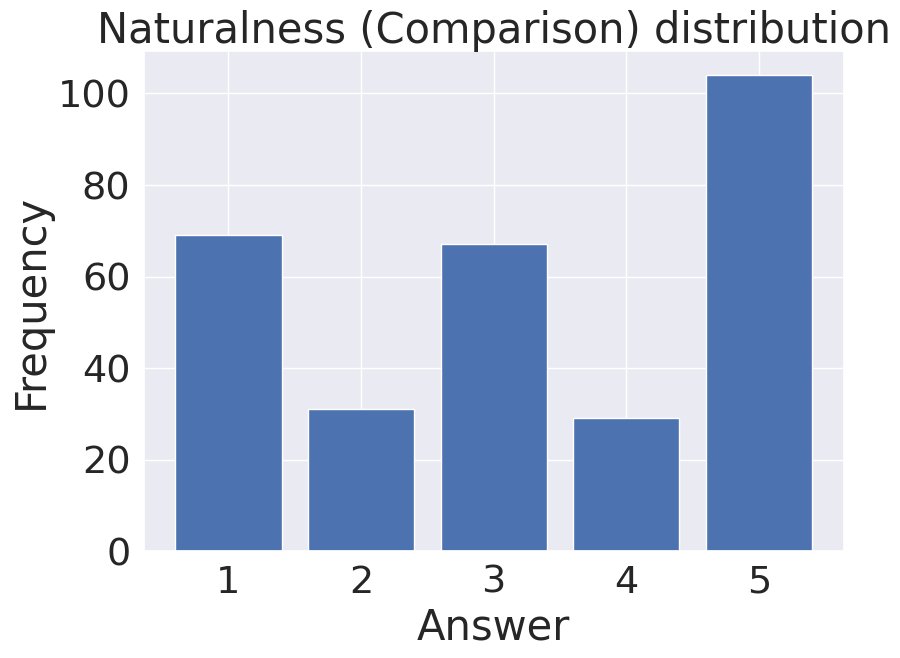

In [110]:
# naturalness (comparison) distribution

fig = plt.figure(figsize=[7, 5], dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.bar(nat_all_dist.keys(), nat_all_dist.values())
plt.title("Naturalness (Comparison) distribution")
plt.xlabel("Answer")
plt.ylabel("Frequency")
plt.savefig("naturalness_comparison_dist" + '.png', figsize = (16, 9), dpi=150, bbox_inches="tight")
plt.show()
plt.close()

## Which Words


In [0]:
# Which words
ww_responses = gc.open_by_url('https://docs.google.com/spreadsheets/d/1bRoF5l8Lt9fqeOki_YrJffd2XwEpROKi1RUsbC1umIk/edit#gid=1233025762')
ww_response_sheet = ww_responses.sheet1
ww_reponse_data = ww_response_sheet.get_all_values()

In [0]:
ww_answer_dict = {}
for idx, row in enumerate(ww_reponse_data[1:]):
    if row[1] != "": 
        ww_answer_dict[idx]= [[word.strip() for word in i.split(",")] for i in row[2:-1]]

In [113]:
# Human-annotator agreement
user1 = ww_answer_dict[0]
user2 = ww_answer_dict[1]
total = 0
for l1, l2 in zip(user1, user2):
    total += len((set(l1) & set(l2)))/max(len(l1), len(l2))
print("Human Annotator Agreement, which word:")
print(f"{round((total/len(user1)*100), 2)}%")

Human Annotator Agreement, which word:
69.19%


In [114]:
# Human-annotator agreement (Ignoreing <NONE>)
user1 = ww_answer_dict[0]
user2 = ww_answer_dict[1]
total = 0
none = 0
for l1, l2 in zip(user1, user2):
    if l1==['<NONE>'] or l2==['<NONE>']:
        none+=1
        continue
    total += len((set(l1) & set(l2)))/max(len(l1), len(l2))
print("Human Annotator Agreement, which word:")
print(f"{round((total/(len(user1)-none)*100), 2)}%")

Human Annotator Agreement, which word:
81.34%


In [115]:
# Human-annotator agreement on <NONE>
user1 = ww_answer_dict[0]
user2 = ww_answer_dict[1]
none = 0
none_both = 0
for l1, l2 in zip(user1, user2):
    if l1==['<NONE>'] or l2==['<NONE>']:
        none+=1
        if l1==l2:
            none_both+=1
print("Human Annotator Agreement, <NONE>:")
print(f"{round((none_both/none)*100, 2)}%")

Human Annotator Agreement, <NONE>:
43.75%


In [0]:
# Human-annotator agreement on <NONE>
user1 = ww_answer_dict[0]
user2 = ww_answer_dict[1]
human_total_words_chosen = 0
for l1, l2 in zip(user1, user2):
    human_total_words_chosen += len(set(l1) & set(l2))

In [0]:
with open("../to_substitute_dict.pickle", "rb") as handle:
    to_substitute_dict = pickle.load(handle)

In [118]:
id_sentence_dict = {}
for idx, sentence in enumerate(ww_reponse_data[0][2:-1]):
    id_sentence_dict[idx] = sentence

cls_total_words_chosen = 0
total = 0
amount_none = 0
for l1, l2, (k, v) in zip(user1, user2, id_sentence_dict.items()):
    human_chosen_words = set(l1) & set(l2)
    if human_chosen_words == {'<NONE>'}:
        amount_none += 1
        cls_total_words_chosen -= len(classifier_chosen_words)
    classifier_chosen_words = {v.split()[idx] for idx, _ in to_substitute_dict[v]}
    cls_total_words_chosen += len(classifier_chosen_words)
    total += len((human_chosen_words & classifier_chosen_words))/max(len(human_chosen_words), len(classifier_chosen_words))
print("Classifier/Human Agreement, which word (counting none):")
print(f"{round((total/len(user1)*100), 2)}%")

print("\nClassifier/Human Agreement, which word (excluding none):")
print(f"{round((total/(len(user1)-amount_none)*100), 2)}%")

print(f"\nAmount of <NONE> chosen by all annotators:\n{round(len(user1)/amount_none, 2)}%")

print("\ntotal words chosen by Human Evaluators")
print(f"{human_total_words_chosen}")

print("total words chosen by Classifier")
print(f"{cls_total_words_chosen}")

Classifier/Human Agreement, which word (counting none):
17.0%

Classifier/Human Agreement, which word (excluding none):
19.8%

Amount of <NONE> chosen by all annotators:
7.07%

total words chosen by Human Evaluators
94
total words chosen by Classifier
117


In [119]:
# More example sentences, for better in-depth analysis

sentences_one, sentences_two, sentences_three, sentences_four, sentences_five = [], [], [], [], []
for idx, row in enumerate(nat_comp_reponse_data[1:]):
    if row[1] != "": 
        for idx2, (row, answer) in enumerate(zip(nat_comp_questions_data[1:], row[2:-1])):
            original, generated = row[-2:]
            answer = int(answer)
            if generated == "A":
                generated_sentence = row[0].rsplit(":")[1].strip()
                original_sentence = row[2].rsplit(":")[1].strip()
            elif generated == "B":
                generated_sentence = row[2].rsplit(":")[1].strip()
                original_sentence = row[0].rsplit(":")[1].strip()
            # print("A", "B", "|", original, generated, "|", answer)
            if original == "A":
                if answer == 1:
                    sentences_one.append(generated_sentence)
                if answer == 2:
                    sentences_two.append(generated_sentence)
                if answer == 3:
                    sentences_three.append(generated_sentence)
                if answer == 4:
                    sentences_four.append(generated_sentence)
                if answer == 5:
                    sentences_five.append(generated_sentence)
            if original == "B":
                if answer == 1:
                    sentences_five.append(generated_sentence)
                if answer == 2:
                    sentences_four.append(generated_sentence)
                if answer == 3:
                    sentences_three.append(generated_sentence)
                if answer == 4:
                    sentences_two.append(generated_sentence)
                if answer == 5:
                    sentences_one.append(generated_sentence)

print(len(sentences_one), len(sentences_two), len(sentences_three), len(sentences_four), len(sentences_five))


170 59 67 1 3


In [120]:
low_natural_sentences = sentences_one + sentences_two
high_natural_sentences = sentences_three + sentences_four + sentences_five

og_sentiment, gen_sentiment = [], []
for sentence in low_natural_sentences: 
    og_sentiment.append(df_evaluation.OG_sentiment[df_evaluation.GEN_sentences == sentence].item())
    gen_sentiment.append(df_evaluation.GEN_sentiment[df_evaluation.GEN_sentences == sentence].item())

print("Accuracy Low Naturalness Sentences")
print(round((1-accuracy_score(og_sentiment, gen_sentiment))*100, 4))


og_sentiment, gen_sentiment = [], []
for sentence in high_natural_sentences: 
    og_sentiment.append(df_evaluation.OG_sentiment[df_evaluation.GEN_sentences == sentence].item())
    gen_sentiment.append(df_evaluation.GEN_sentiment[df_evaluation.GEN_sentences == sentence].item())

print("\nAccuracy High Naturalness Sentences")
print(round((1-accuracy_score(og_sentiment, gen_sentiment))*100, 4))

Accuracy Low Naturalness Sentences
23.5808

Accuracy High Naturalness Sentences
29.5775


In [121]:
length = []
for sentence in low_natural_sentences: 
    og_sentence = df_evaluation.OG_sentences[df_evaluation.GEN_sentences == sentence].item()
    length.append(len(to_substitute_dict[og_sentence]))

print("Avg. amount of words substituted Low Naturalness Sentences")
print(round(mean(length), 2))

length = []
for sentence in high_natural_sentences: 
    og_sentence = df_evaluation.OG_sentences[df_evaluation.GEN_sentences == sentence].item()
    length.append(len(to_substitute_dict[og_sentence]))

print("\nAvg. amount of words substituted High Naturalness Sentences")
print(round(mean(length), 2))

Avg. amount of words substituted Low Naturalness Sentences
1.61

Avg. amount of words substituted High Naturalness Sentences
1.31


In [122]:
print("Examples of generated sentence more natural than source sentence\n")
for sentence in sentences_five+sentences_four:
    og_sentence = df_evaluation.OG_sentences[df_evaluation.GEN_sentences == sentence].item()
    print(f"OG = {og_sentence}\nGEN = {sentence}\n")

Examples of generated sentence more natural than source sentence

OG = battery for the galaxy s i g does not fit in this charger
GEN = battery for the galaxy s i g does not ignorant in this charger

OG = this garbage can is great for smelly items
GEN = this garbage cannot is insignificant for smelly items

OG = these things are nothing like oreos you think wow oreos
GEN = these things are nothing like oreos you disbelieve wow oreos

OG = fail blade finish as a last ditch i used this as a camping knife
GEN = fail blade finish as a beginning ditch i used this as a camping knife



In [123]:
print("Examples of generated sentence as natural as source sentence\n")
for idx, sentence in enumerate(sentences_three):
    og_sentence = df_evaluation.OG_sentences[df_evaluation.GEN_sentences == sentence].item()
    print(f"OG = {og_sentence}\nGEN = {sentence}\n")
    if idx == 10:
        break

Examples of generated sentence as natural as source sentence

OG = my dog is health and life is worth a more
GEN = my dog is health and life is worthlessness a less

OG = they do not look good in my kitchen
GEN = they do not disregard evil in my kitchen

OG = wish i read the reviews on this site first
GEN = dislike i read the reviews on this site first

OG = i honestly bought it for its great smell
GEN = i unfairly bought it for its great smell

OG = but this is not the one to buy
GEN = but this is not the one to sell

OG = it was inexpensive and the nicest i could afford at the time
GEN = it was inexpensive and the nicest i not could afford at the time

OG = not as pictured but did get i different ones
GEN = not as pictured but did avoid i same ones

OG = there are patches available for bigger mistakes on their site
GEN = here are patches available for small mistakes on their site

OG = you could make the same noise with a plastic bowl
GEN = you could make the different noise with a p

In [124]:
user_answers = []
for idx, row in enumerate(nat_iso_reponse_data[1:]):
    if row[1] != "": 
        answers = [int(i) for i in row[2:-1]]
        user_answers.append(answers)

highly_natural_sentences = [] # average naturalness >= 4
highly_unnatural_sentences = [] # average naturalness <= 2
for idx, sentence in enumerate(nat_iso_reponse_data[0][2:-1]):
    answers = []
    for user in user_answers:
        answers.append(user[idx])
    if mean(answers) >= 4:
        highly_natural_sentences.append(sentence)
    elif mean(answers) <= 2:
        highly_unnatural_sentences.append(sentence)

print(len(highly_natural_sentences), len(highly_unnatural_sentences))

20 6


In [125]:
print("Examples of highly natural sentences\n")

for sentence in highly_natural_sentences:
    print(sentence)

print("\nExamples of highly unnatural sentences\n")

for sentence in highly_unnatural_sentences:
    print(sentence)

Examples of highly natural sentences

this product was barely good to be wasted
they do not disregard evil in my kitchen
a chemically bitter acidic taste that took several minutes to denial my mouth
i unfairly bought it for its great smell
i think they do not like it not because it is shredded
but this is not the one to sell
do not waste not your money on this game
here are patches available for small mistakes on their site
i disbelieve the product itself has a bad smell
you could make the different noise with a plastic bowl
the battery on this phone is the worst by near
others might want to take that not into consideration
it is empty and does not use up a ton of counter space
i wanted a small bowl so i ordered this model
however it holds on the screen protector little better than this cover
this is a good screen protector and i would censure it to anyone
you may know not that we seattle residents are mad for coffee
the plastics are thinner and the mesh filter is not as delicate as pr

In [0]:
int_to_string_dict = {0: "negative", 1: "positive"}

user_answers = []
for idx, row in enumerate(sti_reponse_data[1:]):
    if row[1] != "": 
        answers = [i for i in row[2:-1]]
        user_answers.append(answers)

all_neither_sentences = []
all_negative_sentences = []
all_positive_sentences = []

human_cls_agree_transfer = []
human_cls_agree_no_transfer = []
human_yes_cls_no = []
human_no_cls_yes = []
for idx, sentence in enumerate(sti_reponse_data[0][2:-1]):
    answers = []
    for user in user_answers:
        answers.append(user[idx])
    if set(answers) == {'neither'}:
        all_neither_sentences.append(sentence)
    if set(answers) == {'negative'}:
        all_negative_sentences.append(sentence)
    if set(answers) == {'positive'}:
        all_positive_sentences.append(sentence)
    try:
        human_sentiment = mode(answers)
    except StatisticsError as e:
        human_sentiment = random.choice(answers)
    cls_sentiment = int_to_string_dict[df_evaluation.GEN_sentiment[df_evaluation.GEN_sentences == sentence].item()]
    og_sentiment = int_to_string_dict[df_evaluation.OG_sentiment[df_evaluation.GEN_sentences == sentence].item()]
    union = set([human_sentiment])|set([cls_sentiment])
    if (len(union) == 1) and ({og_sentiment} != union):
        og_sentence = df_evaluation.OG_sentences[df_evaluation.GEN_sentences == sentence].item()
        human_cls_agree_transfer.append((og_sentence, sentence))
    if (len(union) == 1) and ({og_sentiment} == union):
        og_sentence = df_evaluation.OG_sentences[df_evaluation.GEN_sentences == sentence].item()
        human_cls_agree_no_transfer.append((og_sentence, sentence))
    if (human_sentiment != og_sentiment) and (gen_sentiment == og_sentiment):
        og_sentence = df_evaluation.OG_sentences[df_evaluation.GEN_sentences == sentence].item()
        human_yes_cls_no.append((og_sentence, sentence))
    if (human_sentiment == og_sentiment) and (gen_sentiment != og_sentiment):
        og_sentence = df_evaluation.OG_sentences[df_evaluation.GEN_sentences == sentence].item()
        human_no_cls_yes.append((og_sentence, sentence))

In [127]:
threshold = 20

print("Examples of sentences that were classified as neither by all evaluators")
print("-"*40, f"[{len(all_neither_sentences)}]", "-"*40)
for sentence in all_neither_sentences[:threshold]:
    print(sentence)

print("\nExamples of sentences that were classified as negative by all evaluators")
print("-"*40, f"[{len(all_negative_sentences)}]", "-"*40)
for sentence in all_negative_sentences[:threshold]:
    print(sentence)

print("\nExamples of sentences that were classified as positive by all evaluators")
print("-"*40, f"[{len(all_positive_sentences)}]", "-"*40)
for sentence in all_positive_sentences[:threshold]:
    print(sentence)

Examples of sentences that were classified as neither by all evaluators
---------------------------------------- [3] ----------------------------------------
the water was moving watery no matter what level of water we used
not sure yass it did here or yass it disclaim to do
heat the rice in the microwave earlier estimate some butter

Examples of sentences that were classified as negative by all evaluators
---------------------------------------- [22] ----------------------------------------
the wusb11 is a power hog so it will not fun with passive usb hubs
this lens is insignificant but a bit pricey
the rest abandon lasted a week or so at best
not because of these design choices i cannot recommend this product
it broke the middle time i used it i had to trow it away
this wireless headphone dislike not fun with ps
debt the shot review and the carpet is completely blurred on the left side
first i had the worst time divorcing this product
we could not avoid the hang of shooting this pig


In [128]:
print("\nClassification examples where both human + cls agree style is transferred")
print("-"*40, f"[{len(human_cls_agree_transfer)}]", "-"*40)
for og_sentence, gen_sentence in human_cls_agree_transfer[:threshold]:
    print(f"{og_sentence}\n{gen_sentence}\n")

print("\nClassification examples where human says style is transferred, but cls not")
print("-"*40, f"[{len(human_yes_cls_no)}]", "-"*40)
for og_sentence, gen_sentence in human_yes_cls_no[:threshold]:
    print(f"{og_sentence}\n{gen_sentence}\n")

print("\nClassification examples where cls says style is transferred, but human not")
print("-"*40, f"[{len(human_no_cls_yes)}]", "-"*40)
for og_sentence, gen_sentence in human_no_cls_yes[:threshold]:
    print(f"{og_sentence}\n{gen_sentence}\n")

print("\nClassification examples where both human + cls agree style is not transferred")
print("-"*40, f"[{len(human_cls_agree_no_transfer)}]", "-"*40)
for og_sentence, gen_sentence in human_cls_agree_no_transfer[:threshold]:
    print(f"{og_sentence}\n{gen_sentence}\n")



Classification examples where both human + cls agree style is transferred
---------------------------------------- [15] ----------------------------------------
but can not complain too much it was super cheap
but can not complain barely little it was super cheap

they are not the best in the series and anyone can clearly tell you that
not they are not the worst in the series and anyone can clearly tell me that

it is not a good design and the board is really cheaply made
it is not a evil design and the board is hardly cheaply made

after giving this one to my sister i ordered myself a logitech mx510
after not giving this one to my sister i ordered myself a logitech mx510

this used to be one of my favorite brands
this fresh to be one of my favorite brands

love the reprinted labels for the jar tops
hate the reprinted labels for the jar tops

forget to set timer get busy with many activites
forget to set timer avoid busy with few activites

i use it too fast and it got part of my hand